## Requirements:
#### - clean the data set
#### - visualize/analyze the following set of data:-
##### 1) the most popular shipping method.
##### 2) the sales per customer segment. 
##### 3) the sales per region.
##### 4) the sales per product category. 
##### 5) the sales per product sub-category. 
##### 6) the sales of each segment in all regions. 
##### 7) the sales of each product categeory in all regions.
##### 8) top 10 customers with the most orders. 
##### 9) top 8 customers with the most spending.
##### 10) top 8 highest spending cities. 
##### 11) top 5 highest spending states. 
##### 12) sales per year.

### Importing the required libraries:

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import kaggle 
import zipfile

### Importing and understanding the data set:

In [2]:
# !kaggle datasets download rohitsahoo/sales-forecasting -f train.csv

In [3]:
zip_file = 'train.csv.zip'
with zipfile.ZipFile(zip_file, 'r') as file:
    zip_list = file.namelist()
    for result in zip_list:
        print(result)
    file.extractall()

train.csv


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df.shape

(9800, 18)

In [8]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [9]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [10]:
df['Country'].value_counts()

Country
United States    9800
Name: count, dtype: int64

In [11]:
df['Region'].value_counts()

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

In [12]:
df['Category'].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [13]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

### Data cleaning:

#### renaming columns

In [14]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [15]:
df.columns.str.lower()

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales'],
      dtype='object')

In [16]:
df.columns = df.columns.str.lower()

In [17]:
df.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales'],
      dtype='object')

In [18]:
df.columns.str.replace(' ','_')

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [19]:
df.columns = df.columns.str.replace(' ','_')

In [20]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [21]:
df.rename(columns = {'sub-category':'sub_category'}, inplace = True)

In [22]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### dropping redundant columns

In [23]:
df.drop(columns = ['country', 'postal_code'], inplace = True)

In [24]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [25]:
df.set_index('row_id', inplace = True)

In [26]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### handling duplicate values

In [27]:
df.duplicated(keep = False).sum()

2

In [28]:
df[df.duplicated(keep = False)]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
3406,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3407,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [29]:
df.drop_duplicates(keep = 'first', inplace = True)

In [30]:
df.duplicated(keep = False).sum()

0

#### checking for null values

In [31]:
df.isna().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
city             0
state            0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
dtype: int64

### Data analysis/visualization:

#### analyze the most popular shipping method

In [32]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [33]:
df.groupby('ship_mode')['order_id'].count()

ship_mode
First Class       1501
Same Day           538
Second Class      1902
Standard Class    5858
Name: order_id, dtype: int64

In [34]:
df_ship_mode = df.groupby('ship_mode')['order_id'].count()

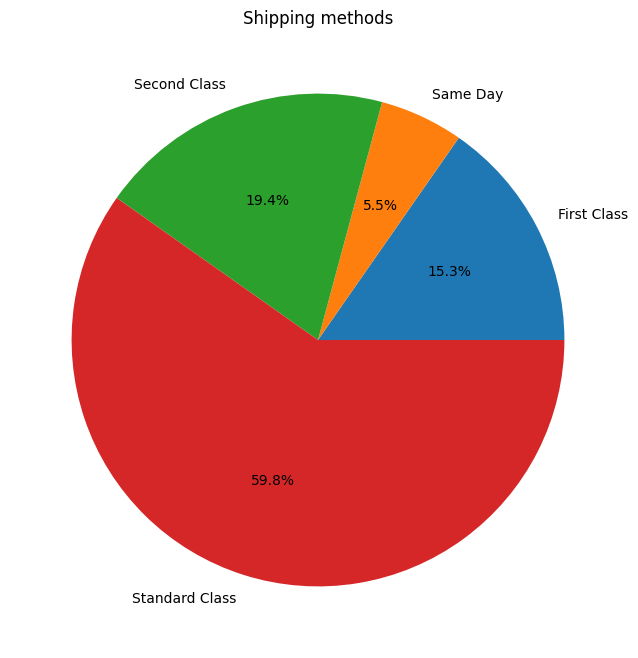

In [35]:
df_ship_mode.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (10,8))
plt.ylabel(None)
plt.title('Shipping methods')
plt.show()

#### analyze the sales per customer segmentation

In [36]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [37]:
df.groupby('segment', as_index = False)['sales'].sum()

,segment,sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.247008e+05


In [38]:
df_segment_sales = df.groupby('segment', as_index = False)['sales'].sum()

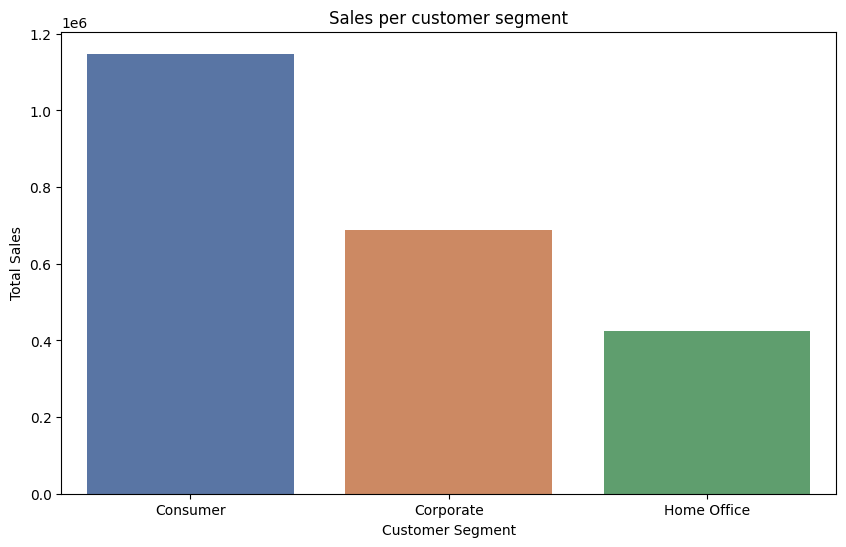

In [39]:
plt.figure(figsize = (10,6))
sns.barplot(df_segment_sales, x = 'segment', y = 'sales', hue = 'segment', palette = 'deep')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Sales per customer segment')
plt.show()

#### analyze the sales per region

In [40]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [41]:
df.groupby('region')['sales'].sum()

region
Central    492646.9132
East       669237.3540
South      389151.4590
West       710219.6845
Name: sales, dtype: float64

In [42]:
df_region_sales = df.groupby('region')['sales'].sum()

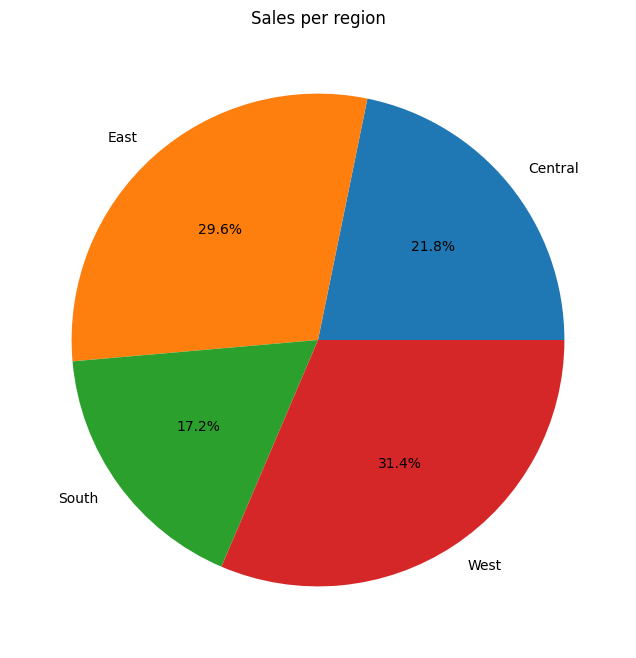

In [43]:
df_region_sales.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (10,8))
plt.ylabel(None)
plt.title('Sales per region')
plt.show()

#### analyze the sales per product category

In [44]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [45]:
df.groupby('category', as_index = False)['sales'].sum()

,category,sales
0,Furniture,728377.2037
1,Office Supplies,705422.3340
2,Technology,827455.8730


In [46]:
df_cat_sales = df.groupby('category', as_index = False)['sales'].sum()

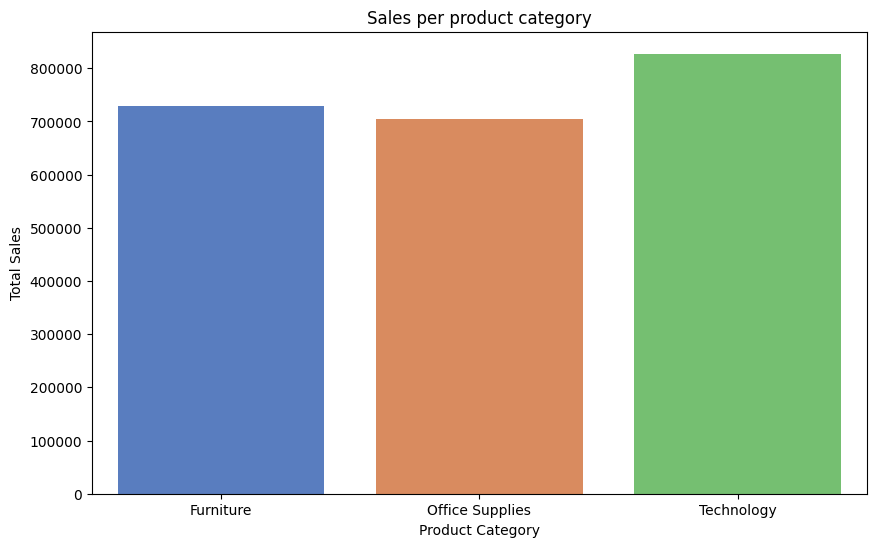

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(df_cat_sales, x = 'category', y = 'sales', hue = 'category', palette = 'muted')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales per product category')
plt.show()

#### analyze the sales per product sub-category

In [48]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [49]:
df.groupby('sub_category', as_index = False)['sales'].sum()

,sub_category,sales
0,Accessories,164186.7000
1,Appliances,104618.4030
2,Art,26705.4100
3,Binders,200028.7850
4,Bookcases,113813.1987
5,Chairs,322541.3590
6,Copiers,146248.0940
7,Envelopes,16128.0460
8,Fasteners,3001.9600
9,Furnishings,89212.0180


In [50]:
df_sub_sales = df.groupby('sub_category', as_index = False)['sales'].sum()

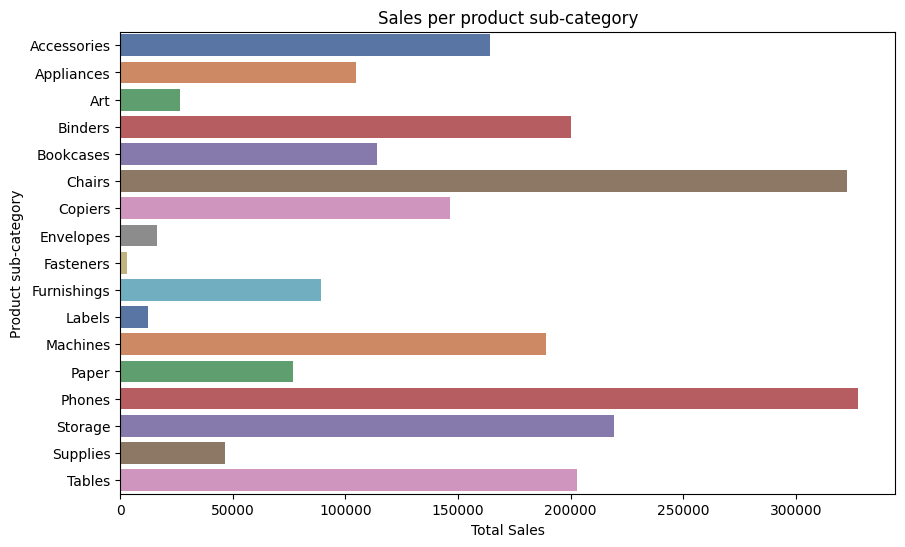

In [51]:
plt.figure(figsize = (10,6))
sns.barplot(df_sub_sales, x = 'sales', y = 'sub_category', hue = 'sub_category', palette = 'deep')
plt.xlabel('Total Sales')
plt.ylabel('Product sub-category')
plt.title('Sales per product sub-category')
plt.show()

#### analyze the sales of each segment for all regions

In [52]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [53]:
df.groupby(['region', 'segment'], as_index = False)['sales'].sum()

,region,segment,sales
0,Central,Consumer,250210.5220
1,Central,Corporate,152031.4968
2,Central,Home Office,90404.8944
3,East,Consumer,347906.6050
4,East,Corporate,195897.4250
5,East,Home Office,125433.3240
6,South,Consumer,194702.2130
7,South,Corporate,120546.8745
8,South,Home Office,73902.3715
9,West,Consumer,355241.1910


In [54]:
df_regionSegment_sales = df.groupby(['region', 'segment'], as_index = False)['sales'].sum()

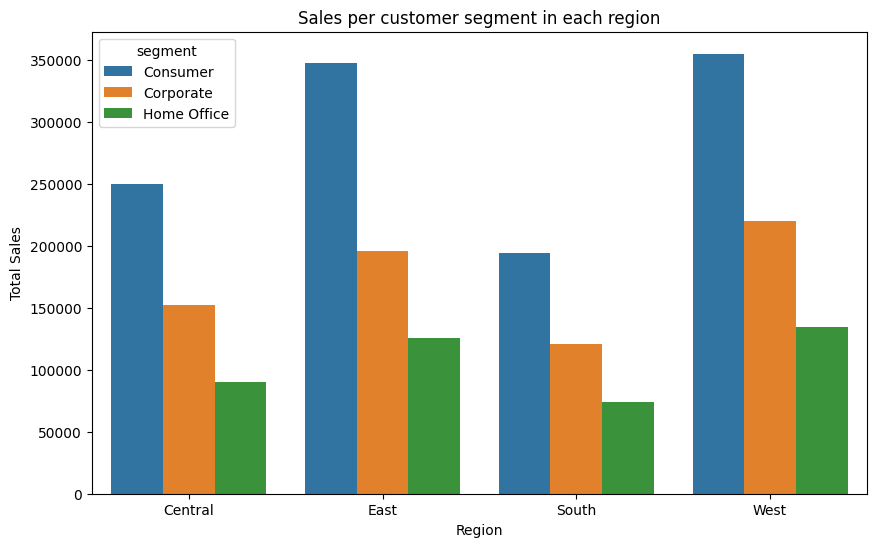

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(df_regionSegment_sales, x = 'region', y = 'sales', hue = 'segment', palette = 'tab10')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales per customer segment in each region')
plt.show()

#### analyze the sales of each product category for all regions

In [56]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [57]:
df.groupby(['region','category'], as_index = False)['sales'].sum()

,region,category,sales
0,Central,Furniture,160317.4622
1,Central,Office Supplies,163590.2430
2,Central,Technology,168739.2080
3,East,Furniture,206180.0160
4,East,Office Supplies,199940.8110
5,East,Technology,263116.5270
6,South,Furniture,116531.4800
7,South,Office Supplies,124424.7710
8,South,Technology,148195.2080
9,West,Furniture,245348.2455


In [58]:
df_regionCat = df.groupby(['region','category'], as_index = False)['sales'].sum()

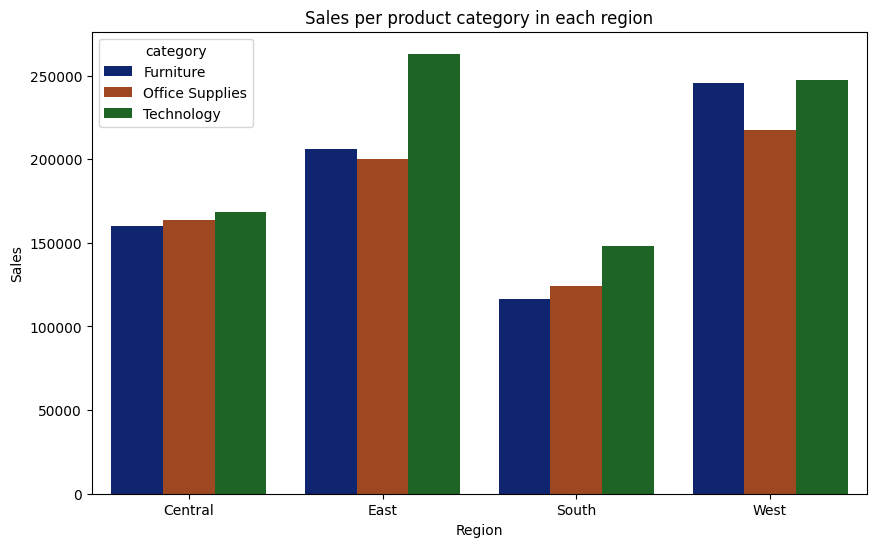

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(df_regionCat, x = 'region', y = 'sales', hue = 'category', palette = 'dark')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales per product category in each region')
plt.show()

#### top 10 customers with the most orders

In [60]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [61]:
df.groupby(['customer_id','customer_name'], as_index = False)['order_id'].count()

,customer_id,customer_name,order_id
0,AA-10315,Alex Avila,11
1,AA-10375,Allen Armold,15
2,AA-10480,Andrew Allen,12
3,AA-10645,Anna Andreadi,18
4,AB-10015,Aaron Bergman,6
...,...,...,...
788,XP-21865,Xylona Preis,28
789,YC-21895,Yoseph Carroll,8
790,YS-21880,Yana Sorensen,12
791,ZC-21910,Zuschuss Carroll,31


In [62]:
df_customer = df.groupby(['customer_id','customer_name'], as_index = False)['order_id'].count()

In [63]:
df_customer.sort_values(by = 'order_id', ascending = False).head(10)

,customer_id,customer_name,order_id
787,WB-21850,William Brown,35
482,MA-17560,Matt Abelman,34
606,PP-18955,Paul Prost,34
387,JL-15835,John Lee,33
147,CK-12205,Chloris Kastensmidt,32
720,SV-20365,Seth Vernon,32
349,JD-15895,Jonathan Doherty,32
275,EP-13915,Emily Phan,31
44,AP-10915,Arthur Prichep,31
791,ZC-21910,Zuschuss Carroll,31


In [64]:
df_customer = df_customer.sort_values(by = 'order_id', ascending = False).head(10)

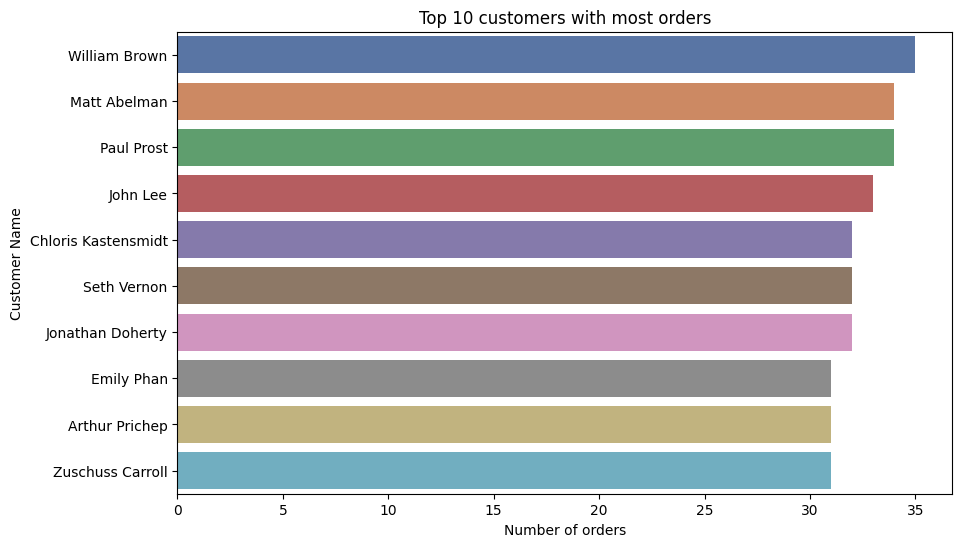

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(df_customer, x = 'order_id', y = 'customer_name', hue = 'customer_name', palette = 'deep')
plt.xlabel('Number of orders')
plt.ylabel('Customer Name')
plt.title('Top 10 customers with most orders')
plt.show()

#### top 8 customers with the most spending

In [66]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [67]:
df.groupby(['customer_id','customer_name'], as_index = False)['sales'].sum()

,customer_id,customer_name,sales
0,AA-10315,Alex Avila,5563.560
1,AA-10375,Allen Armold,1056.390
2,AA-10480,Andrew Allen,1790.512
3,AA-10645,Anna Andreadi,5086.935
4,AB-10015,Aaron Bergman,886.156
...,...,...,...
788,XP-21865,Xylona Preis,2374.658
789,YC-21895,Yoseph Carroll,5454.350
790,YS-21880,Yana Sorensen,6720.444
791,ZC-21910,Zuschuss Carroll,8025.707


In [68]:
df_customer_sales = df.groupby(['customer_id','customer_name'], as_index = False)['sales'].sum()

In [69]:
df_customer_sales.sort_values(by = 'sales', ascending = False).head(8)

,customer_id,customer_name,sales
700,SM-20320,Sean Miller,25043.050
741,TC-20980,Tamara Chand,19052.218
621,RB-19360,Raymond Buch,15117.339
730,TA-21385,Tom Ashbrook,14595.620
6,AB-10105,Adrian Barton,14473.571
434,KL-16645,Ken Lonsdale,14175.229
669,SC-20095,Sanjit Chand,14142.334
327,HL-15040,Hunter Lopez,12873.298


In [70]:
df_customer_sales = df_customer_sales.sort_values(by = 'sales', ascending = False).head(8)

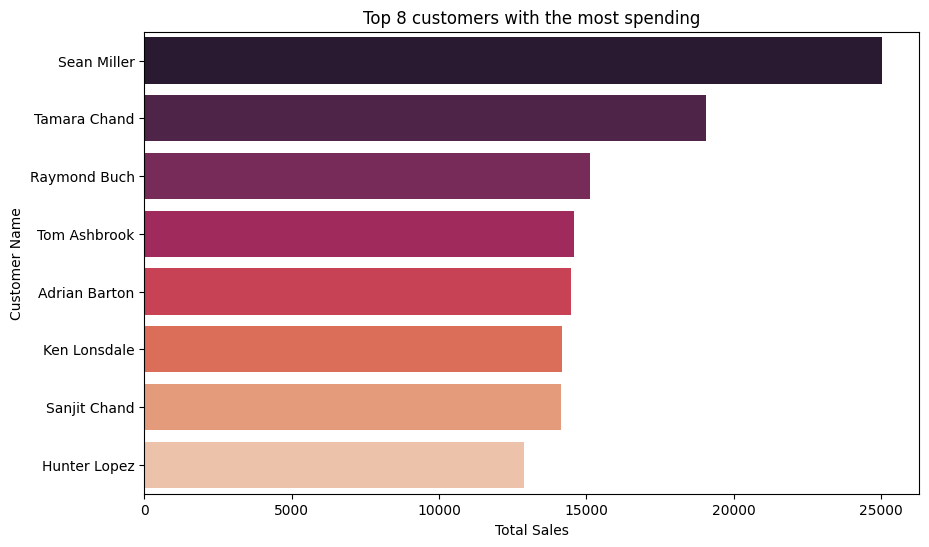

In [71]:
plt.figure(figsize = (10,6))
sns.barplot(df_customer_sales, x = 'sales', y = 'customer_name', hue = 'customer_name', palette = 'rocket')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.title('Top 8 customers with the most spending')
plt.show()

#### top 8 highest spending cities

In [72]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [73]:
df.groupby('city')['sales'].sum()

city
Aberdeen         25.500
Abilene           1.392
Akron          2724.244
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: sales, Length: 529, dtype: float64

In [74]:
df_cities = df.groupby('city')['sales'].sum()

In [75]:
df_cities.sort_values(ascending = False).head(8)

city
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Name: sales, dtype: float64

In [76]:
df_cities = df_cities.sort_values(ascending = False).head(8)

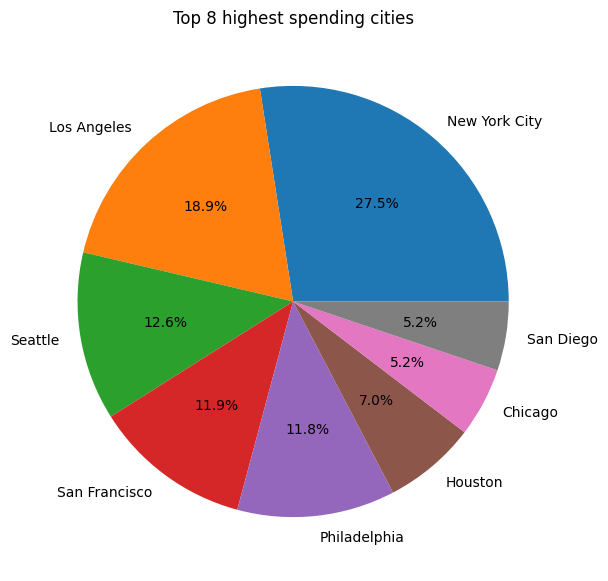

In [77]:
df_cities.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (10,7))
plt.ylabel(None)
plt.title('Top 8 highest spending cities')
plt.show()

#### top 5 highest spending states

In [78]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [79]:
df.groupby('state', as_index = False)['sales'].sum()

,state,sales
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11678.1300
3,California,446306.4635
4,Colorado,31841.5980
5,Connecticut,13384.3570
6,Delaware,27322.9990
7,District of Columbia,2865.0200
8,Florida,88436.5320
9,Georgia,48219.1100


In [80]:
df_states = df.groupby('state', as_index = False)['sales'].sum()

In [81]:
df_states.sort_values(by = 'sales', ascending = False).head(5)

,state,sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500


In [82]:
df_states = df_states.sort_values(by = 'sales', ascending = False).head(5)

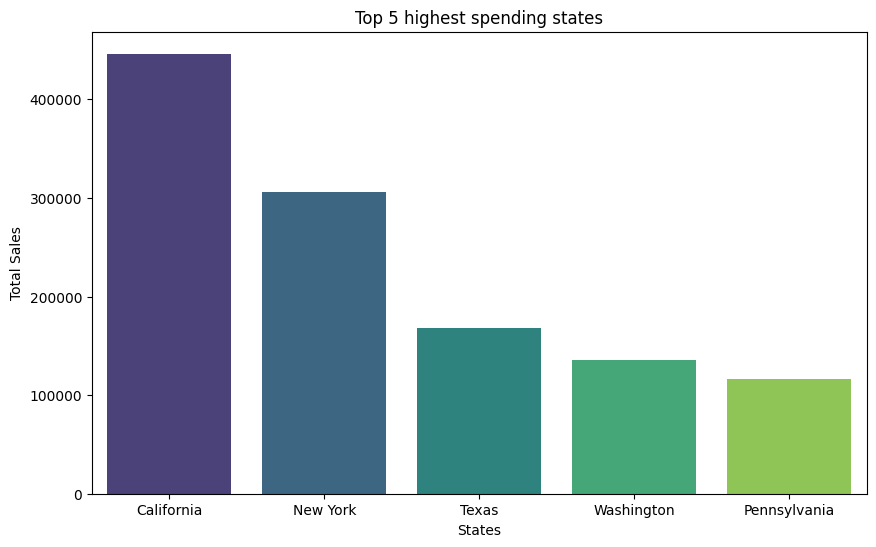

In [83]:
plt.figure(figsize = (10,6))
sns.barplot(df_states, x = 'state', y = 'sales', hue = 'state', palette = 'viridis')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.title('Top 5 highest spending states')
plt.show()

#### sales per year

In [84]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,region,product_id,category,sub_category,product_name,sales
row_id,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [90]:
pd.to_datetime(df['order_date'], dayfirst = True)

row_id
1      2017-11-08
2      2017-11-08
3      2017-06-12
4      2016-10-11
5      2016-10-11
          ...    
9796   2017-05-21
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
9800   2016-01-12
Name: order_date, Length: 9799, dtype: datetime64[ns]

In [91]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst = True)

In [93]:
df.groupby(df['order_date'].dt.year)['sales'].sum().reset_index()

,order_date,sales
0,2015,479574.8361
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


In [94]:
df_yearly_sales = df.groupby(df['order_date'].dt.year)['sales'].sum().reset_index()

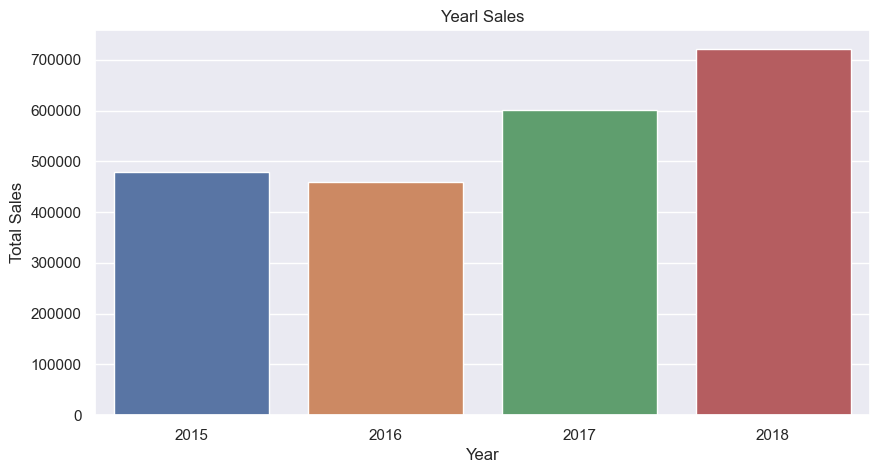

In [113]:
plt.figure(figsize = (10,5))
sns.barplot(df_yearly_sales, x = 'order_date', y = 'sales', hue = 'order_date', palette = 'deep')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearl Sales')
plt.legend().set_visible(False)
plt.show()